In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# 1 Loading the Data, Preprocessing, Initial Data Analysis

In [2]:
df_customerData = pd.read_csv('Wholesale customers data.csv',header=0)

In [3]:
df_customerData.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df_customerData.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df_customerData.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
#plt.scatter(df_customerData.groupby(['Fresh'])['Fresh'].count(), df_customerData.Region)
#plt.xlabel('Region')
#plt.ylabel('Fresh Products')
count_transaction_by_region = df_customerData.groupby(['Region'])['Fresh'].count()

In [7]:
count_transaction_by_region

Region
1     77
2     47
3    316
Name: Fresh, dtype: int64

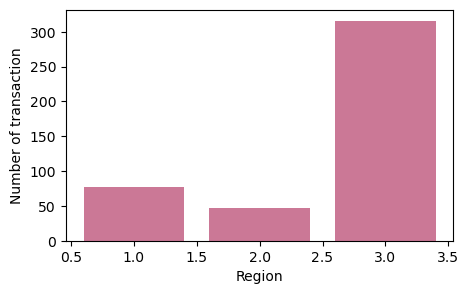

In [8]:
plt.figure(figsize=(5,3))
plt.bar(count_transaction_by_region.index, count_transaction_by_region, color='#CB7896')
plt.xlabel('Region')
plt.ylabel('Number of transaction')
plt.show()

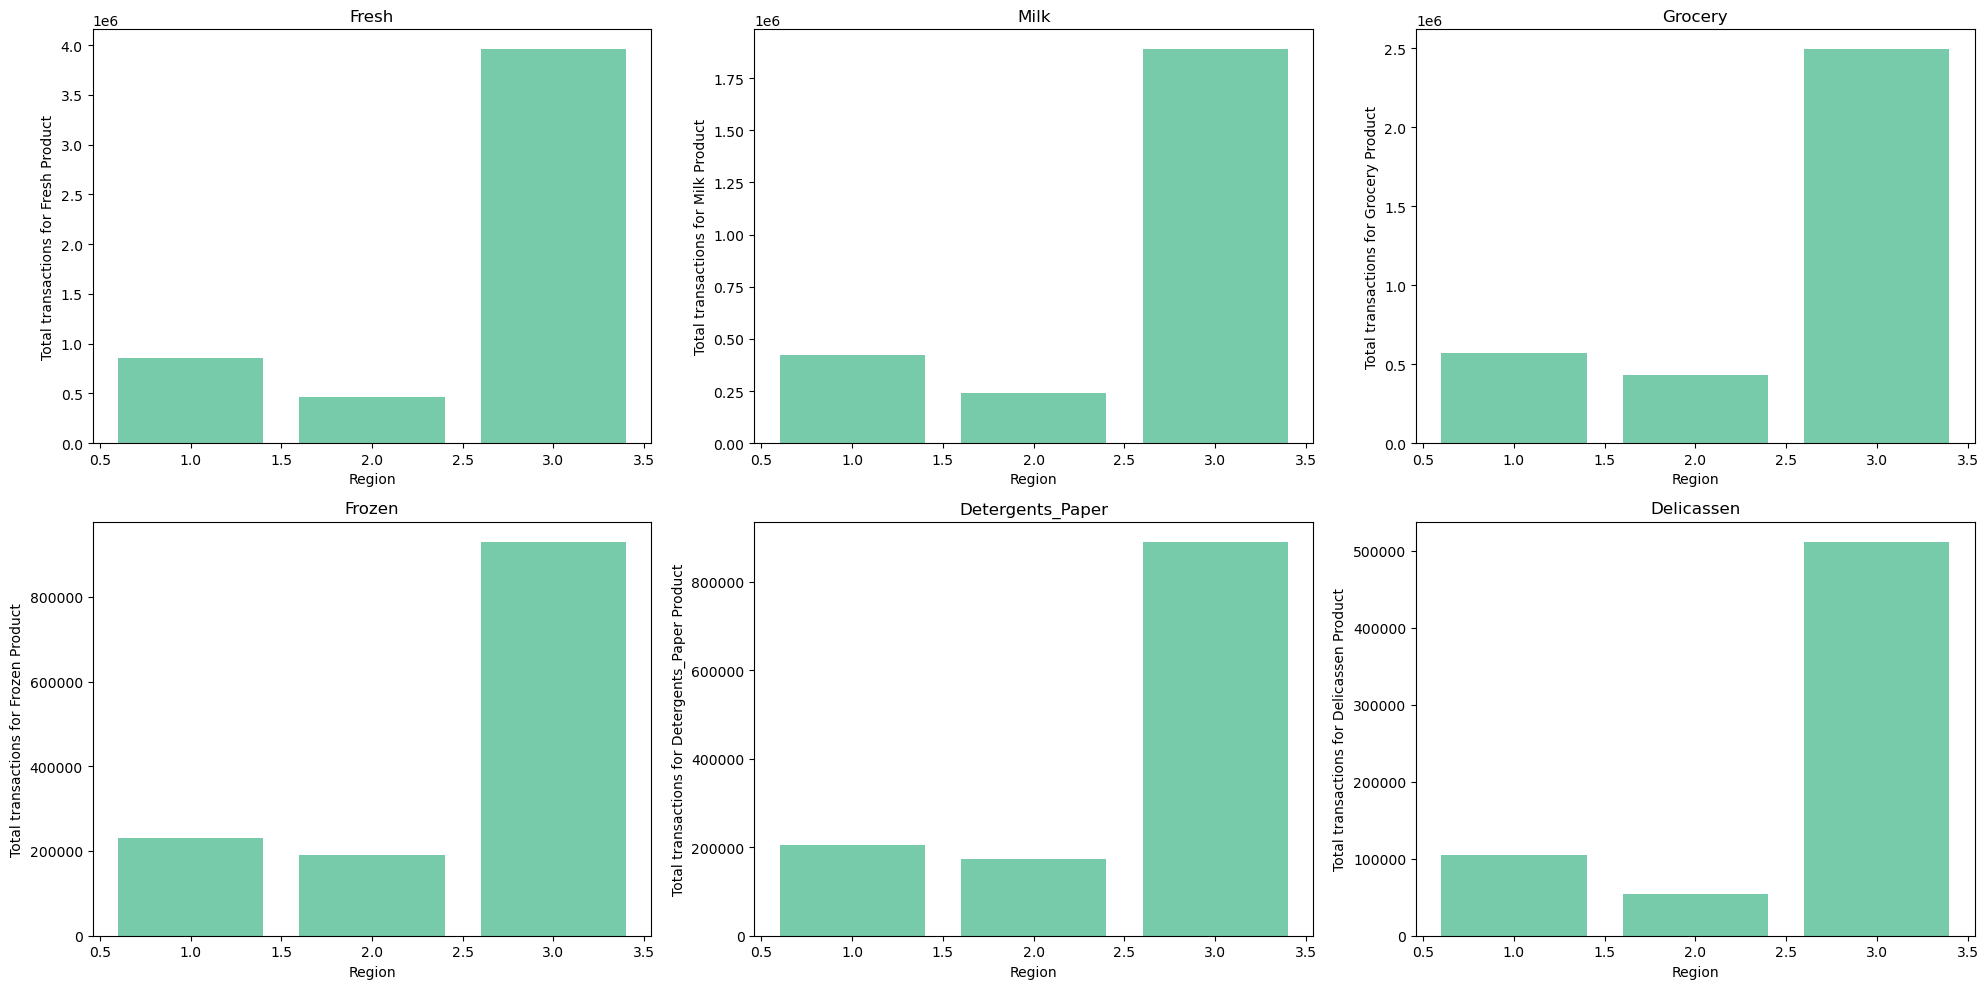

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
start_index=2
for idx, column_name in enumerate(df_customerData):
    if idx >= start_index:
        
        row = (idx-start_index) // 3
        col = (idx-start_index) % 3
        sum_by_region = df_customerData.groupby(['Region'])[column_name].sum()
        
        ax[row,col].bar(sum_by_region.index, sum_by_region, color='#78CBAA')
        ax[row,col].set_xlabel('Region')
        ax[row,col].set_ylabel('Total transactions for {} Product'.format(column_name))
        ax[row,col].set_title(column_name)
        
plt.tight_layout()
plt.show()

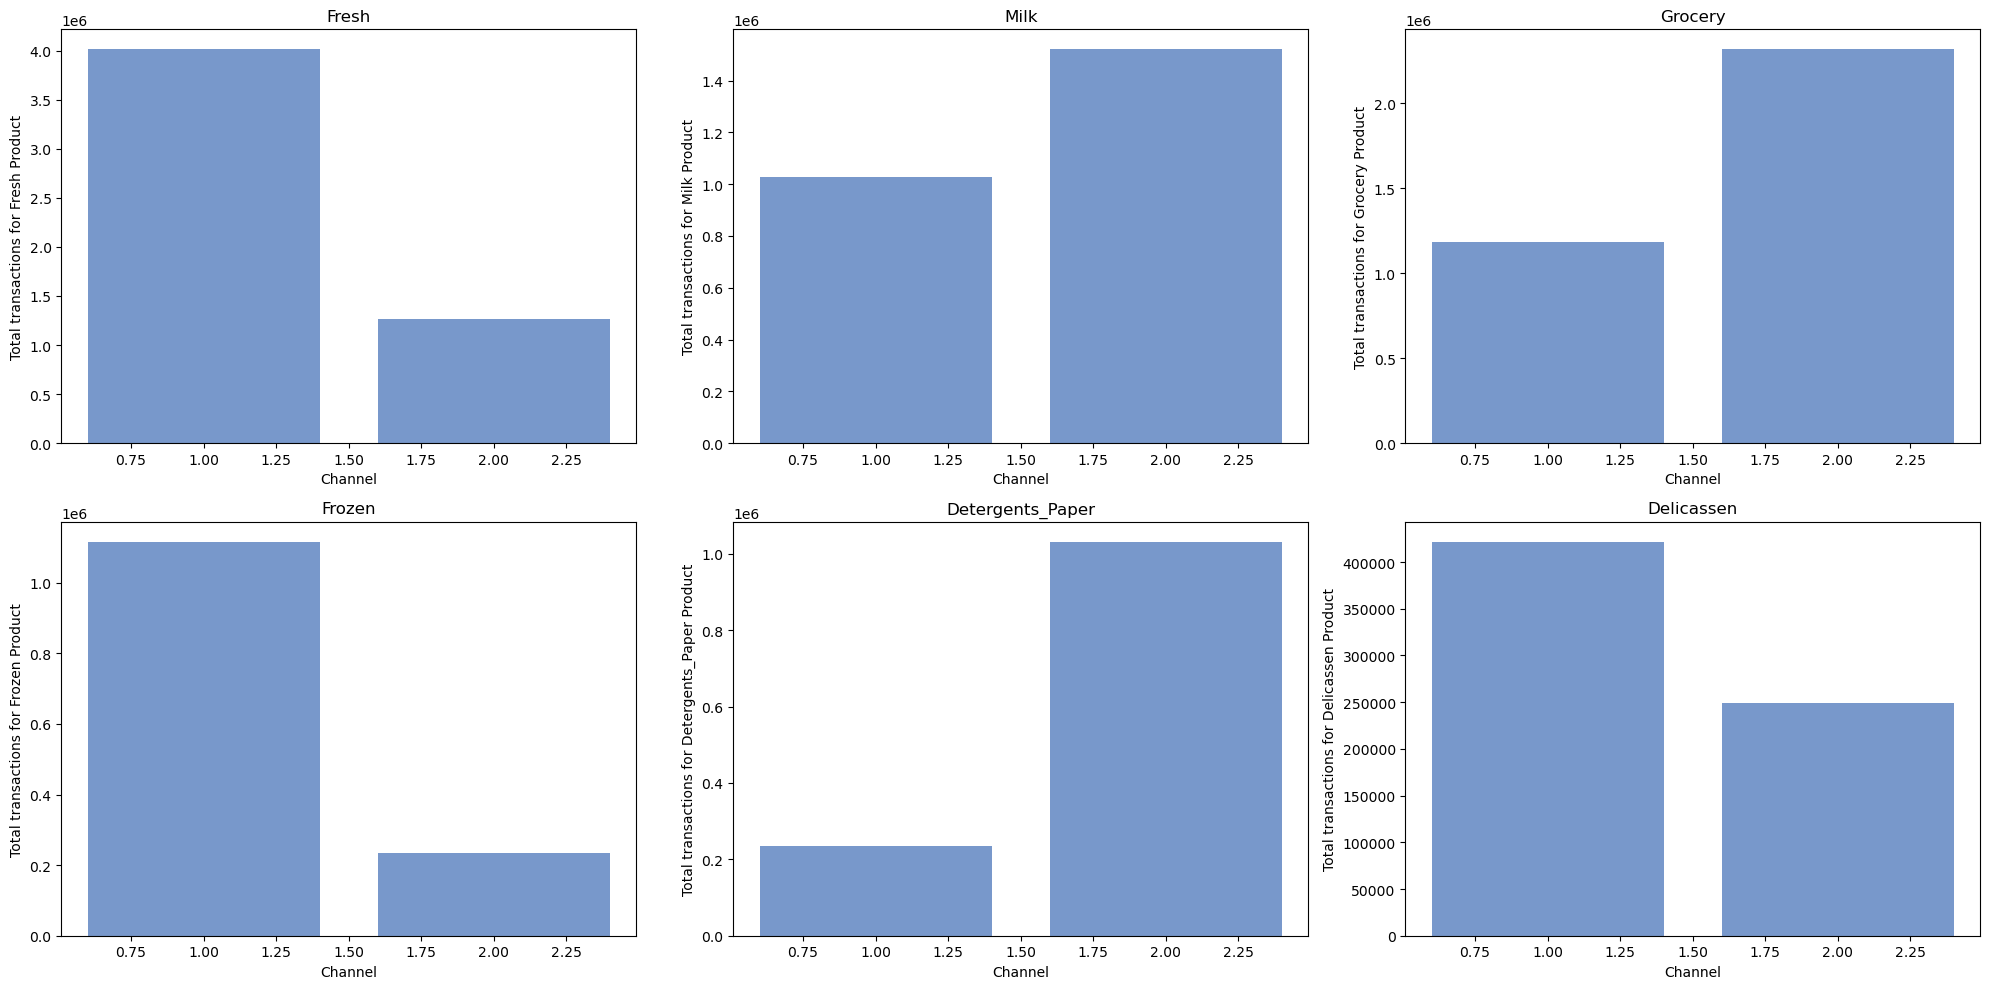

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
start_index=2
for idx, column_name in enumerate(df_customerData):
    if idx >= start_index:
        
        row = (idx-start_index) // 3
        col = (idx-start_index) % 3
        sum_by_channel = df_customerData.groupby(['Channel'])[column_name].sum()
        
        ax[row,col].bar(sum_by_channel.index, sum_by_channel, color='#7898CB')
        ax[row,col].set_xlabel('Channel')
        ax[row,col].set_ylabel('Total transactions for {} Product'.format(column_name))
        ax[row,col].set_title(column_name)
        
plt.tight_layout()
plt.show()

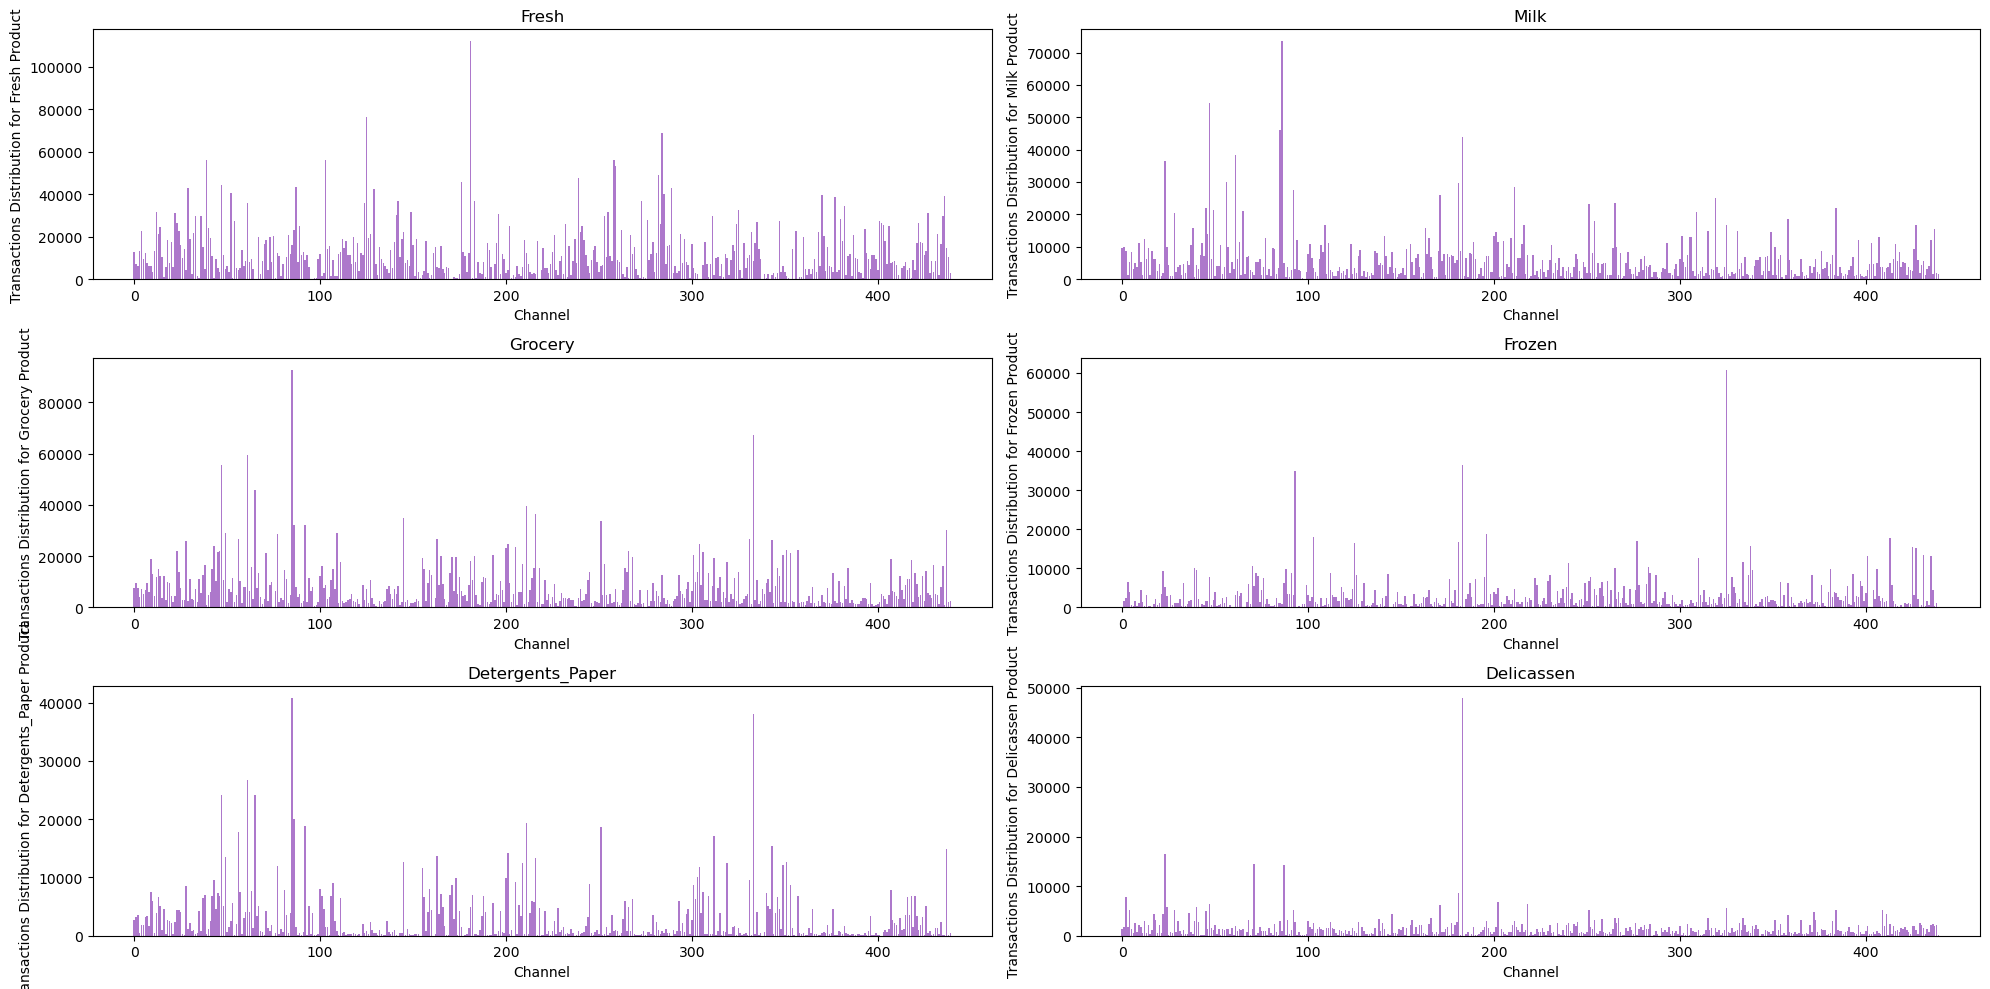

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
start_index=2
for idx, column_name in enumerate(df_customerData):
    if idx >= start_index:
        
        row = (idx-start_index) // 2
        col = (idx-start_index) % 2
        
        ax[row,col].bar(df_customerData[column_name].index, df_customerData[column_name], color='#AD78CB')
        ax[row,col].set_xlabel('Channel')
        ax[row,col].set_ylabel('Transactions Distribution for {} Product'.format(column_name))
        ax[row,col].set_title(column_name)
        
plt.tight_layout()
plt.show()

C:\Users\vevit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


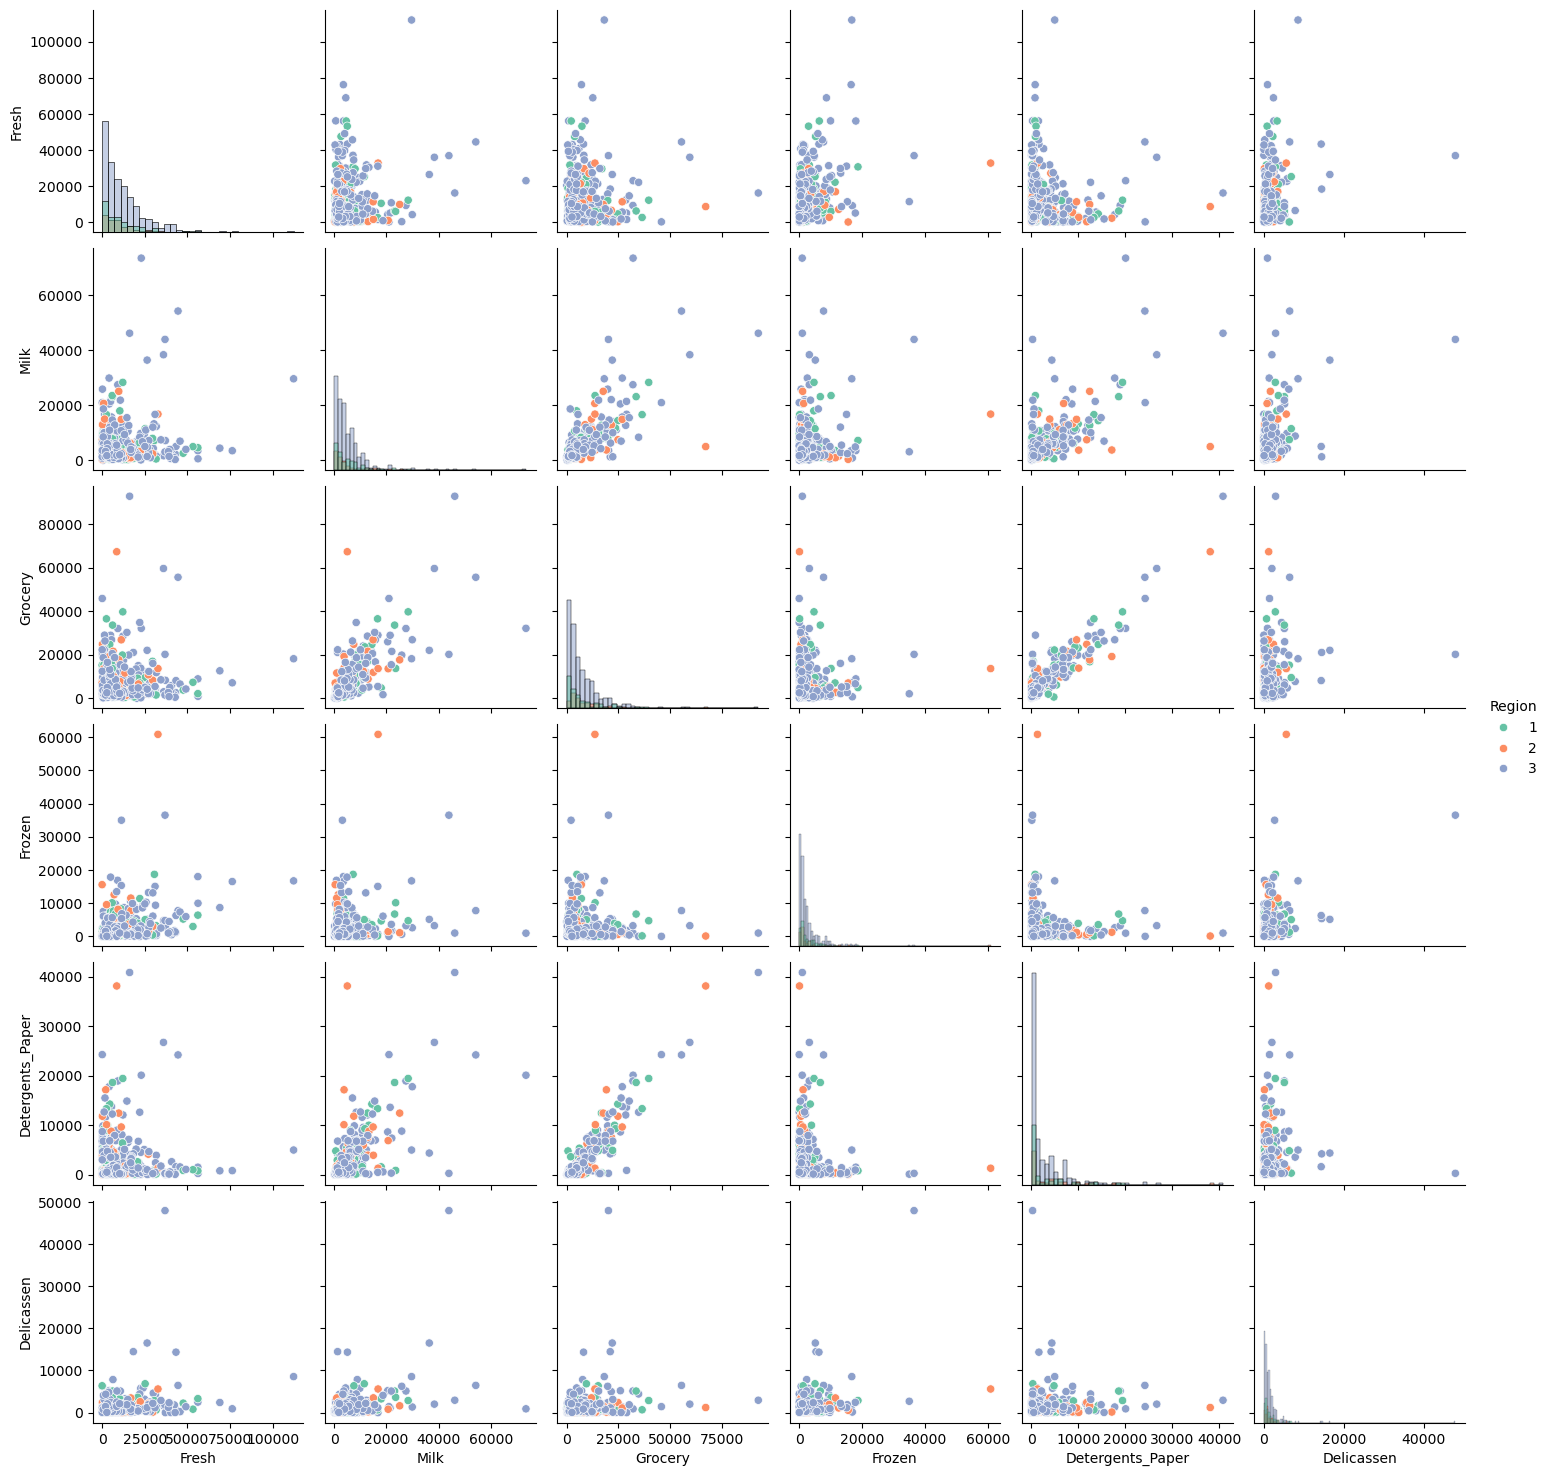

In [12]:
df_productsTransasctionByRegion = df_customerData.iloc[:, 1:]
sns.pairplot(df_productsTransasctionByRegion, hue='Region', diag_kind='hist', palette = 'Set2')

C:\Users\vevit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


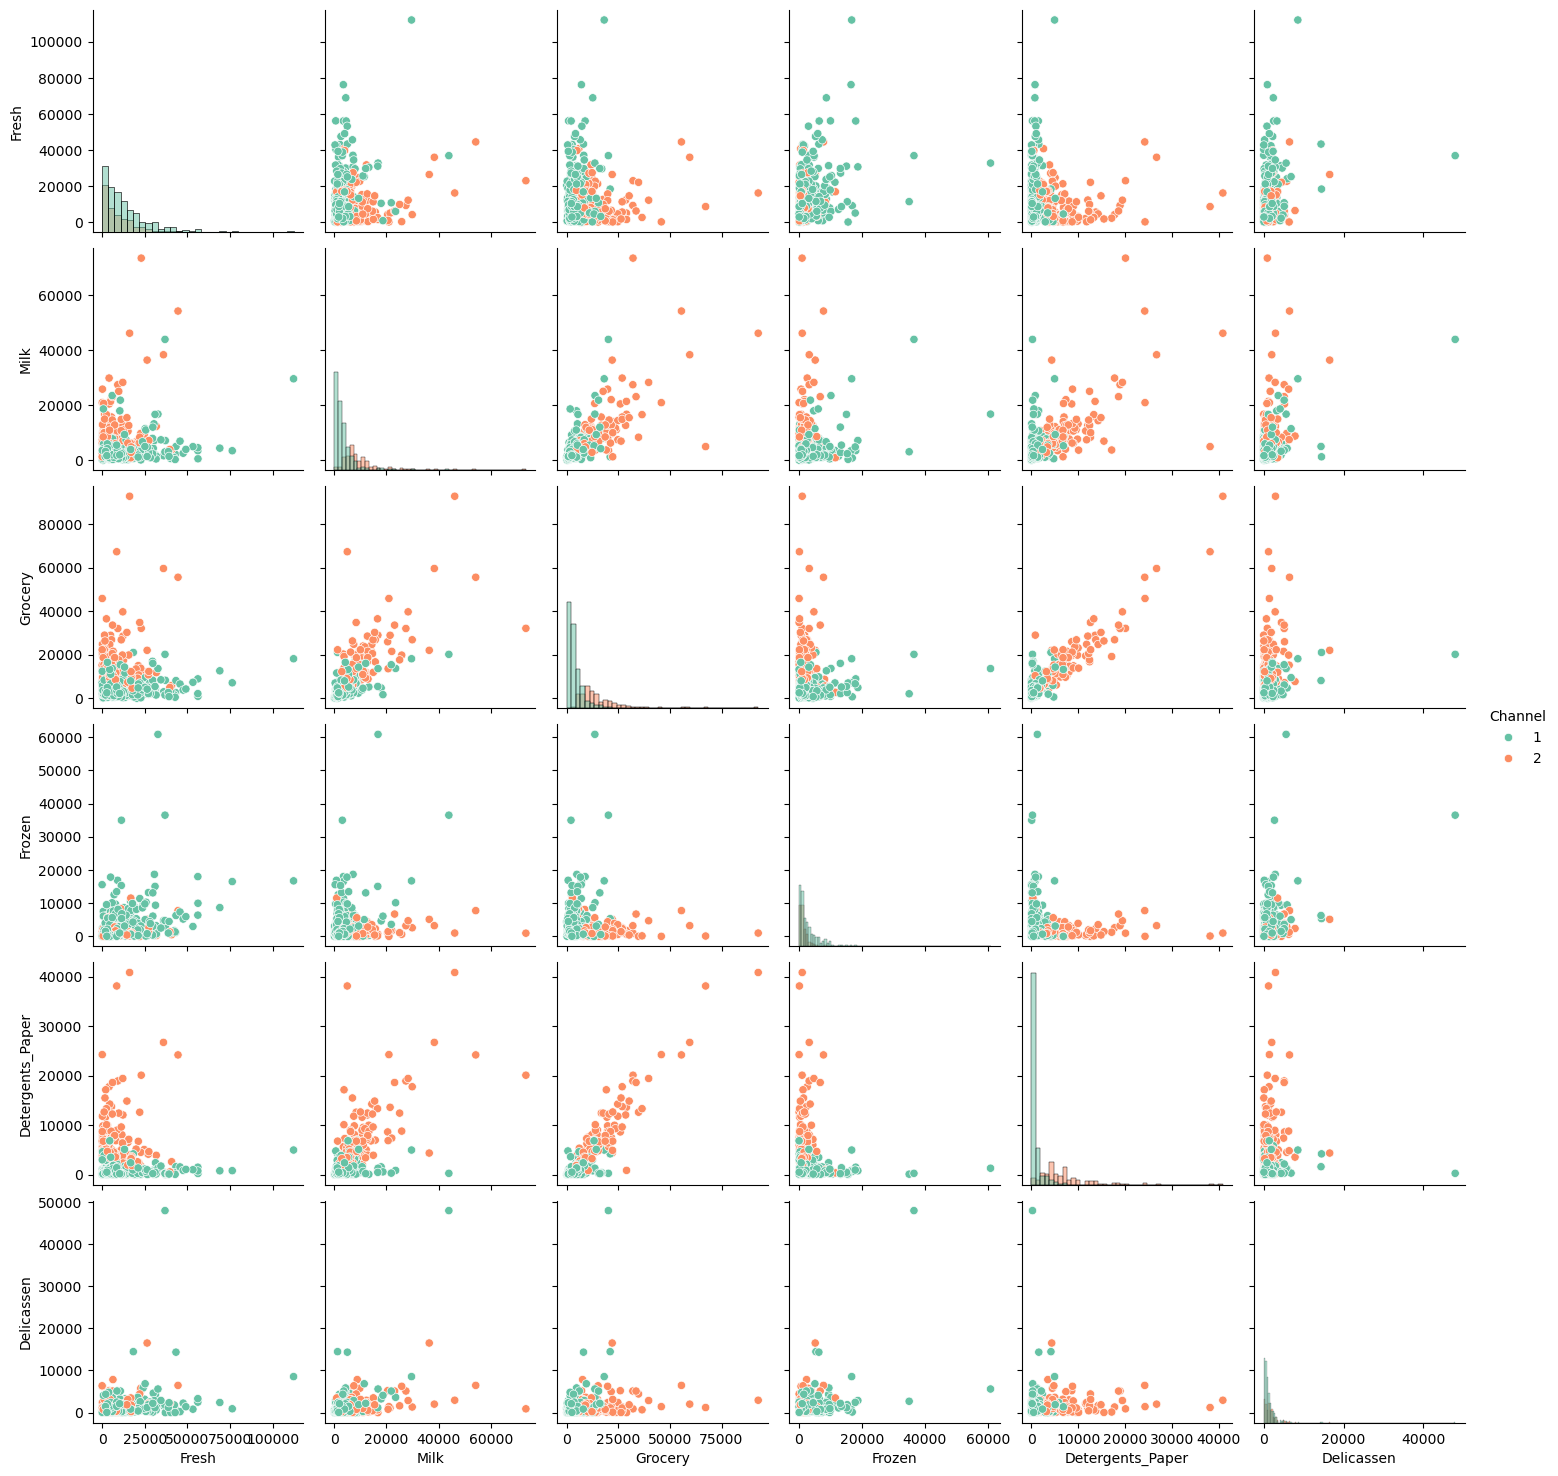

In [13]:
df_productsTransasctionByChannel = df_customerData.drop(['Region'], axis=1)
sns.pairplot(df_productsTransasctionByChannel, hue='Channel', diag_kind='hist', palette = 'Set2')

### Applying x → log(x + θ) transformation

In [14]:
theta = 10
df_customerData.iloc[:,2:] = np.log(df_customerData.iloc[:,2:]+theta)

In [15]:
df_customerData

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,9.447702,9.176370,8.932080,5.411646,7.895063,7.206377
1,2,3,8.863191,9.192176,9.167224,7.479864,8.102586,7.487734
2,2,3,8.758255,9.084550,8.948196,7.789455,8.167919,8.968778
3,1,3,9.493638,7.095064,8.350194,8.766238,6.248043,7.494430
4,2,3,10.026811,8.597851,8.882947,8.275122,7.488294,8.555452
...,...,...,...,...,...,...,...,...
435,1,3,10.299340,9.397732,9.682654,9.483797,5.257495,7.702556
436,1,3,10.577401,7.273093,6.651572,8.416267,4.634729,7.764721
437,2,3,9.584728,9.648466,10.317351,6.102559,9.605822,7.537430
438,1,3,9.239899,7.596392,7.715124,6.954639,5.181784,7.666222


C:\Users\vevit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


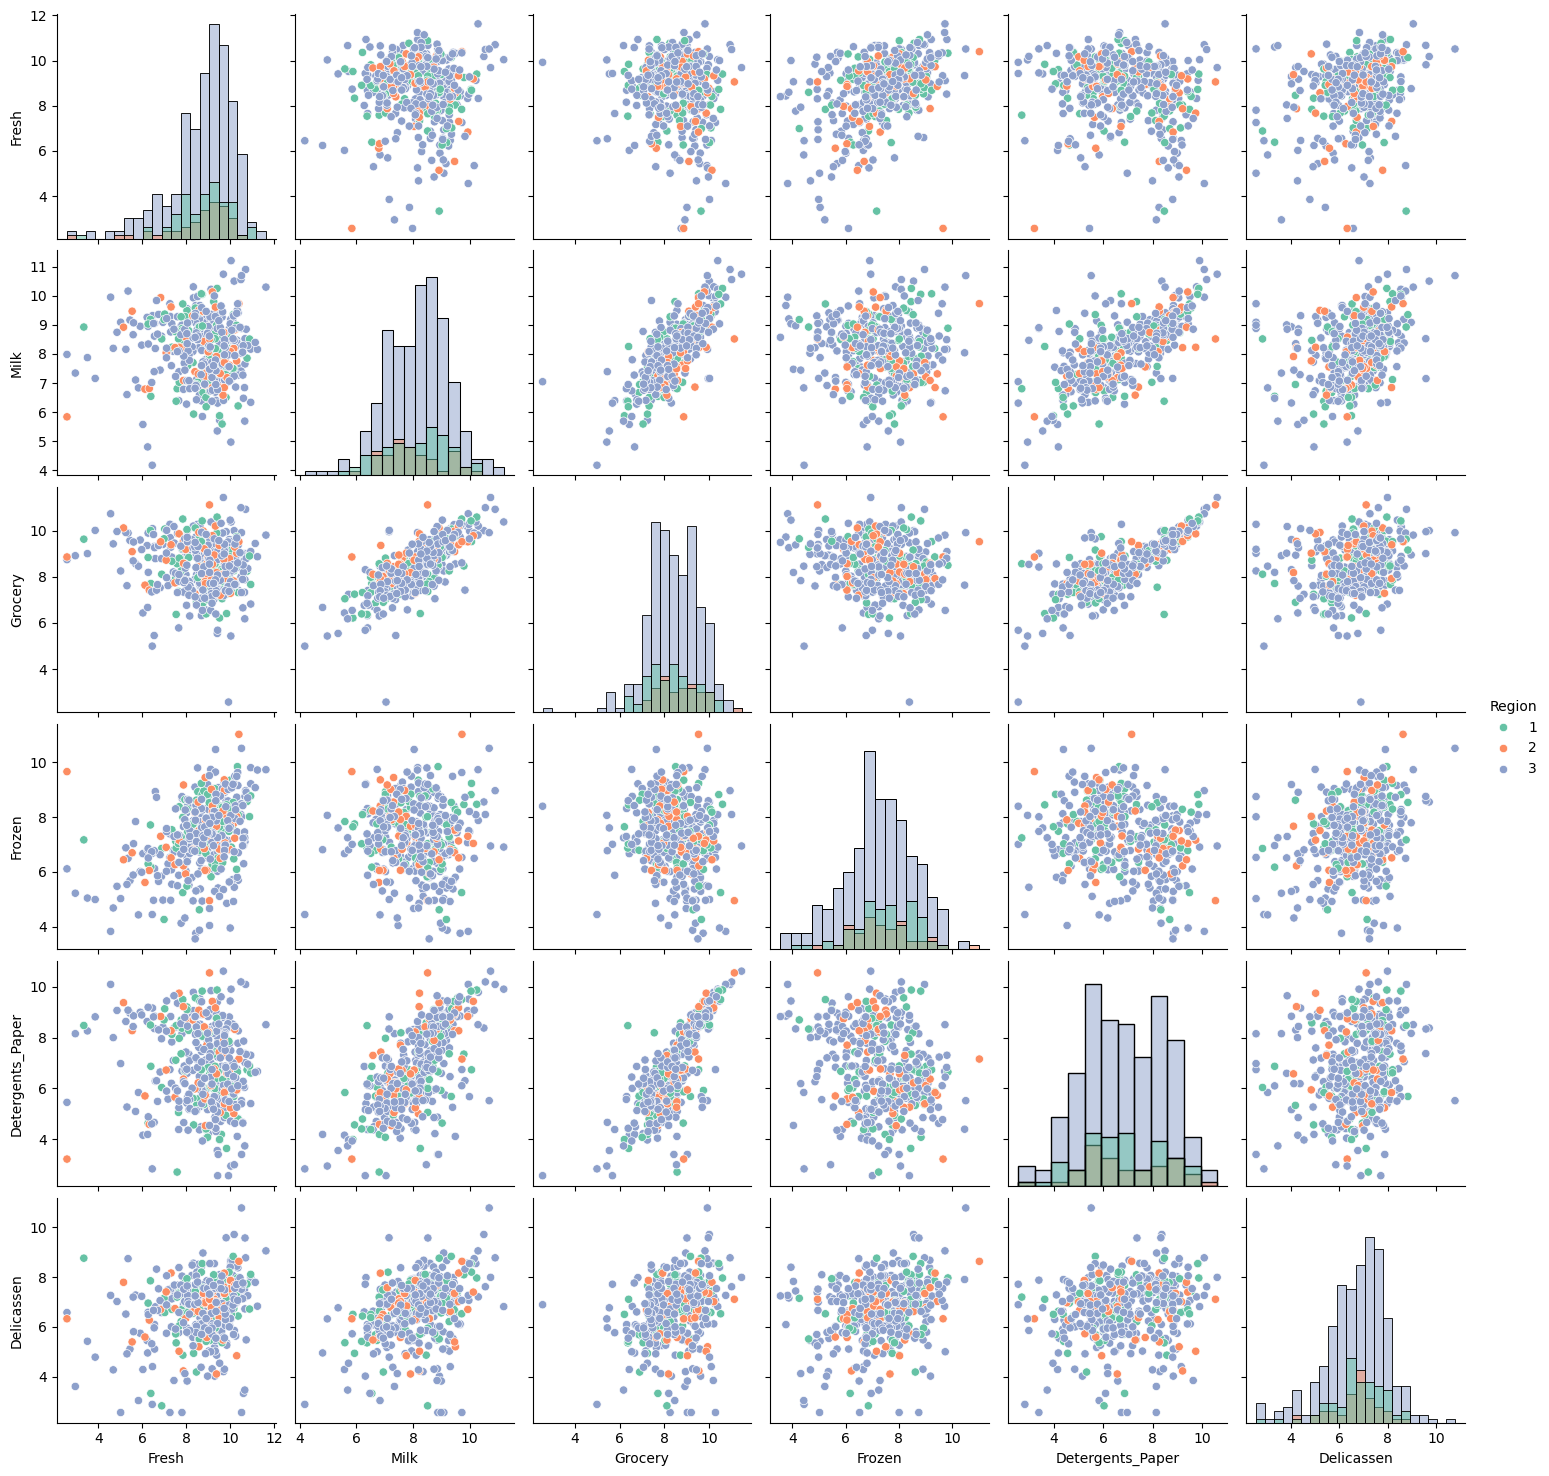

In [16]:
df_productsTransasctionByRegion = df_customerData.iloc[:, 1:]
sns.pairplot(df_productsTransasctionByRegion, hue='Region', diag_kind='hist', palette = 'Set2')

C:\Users\vevit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


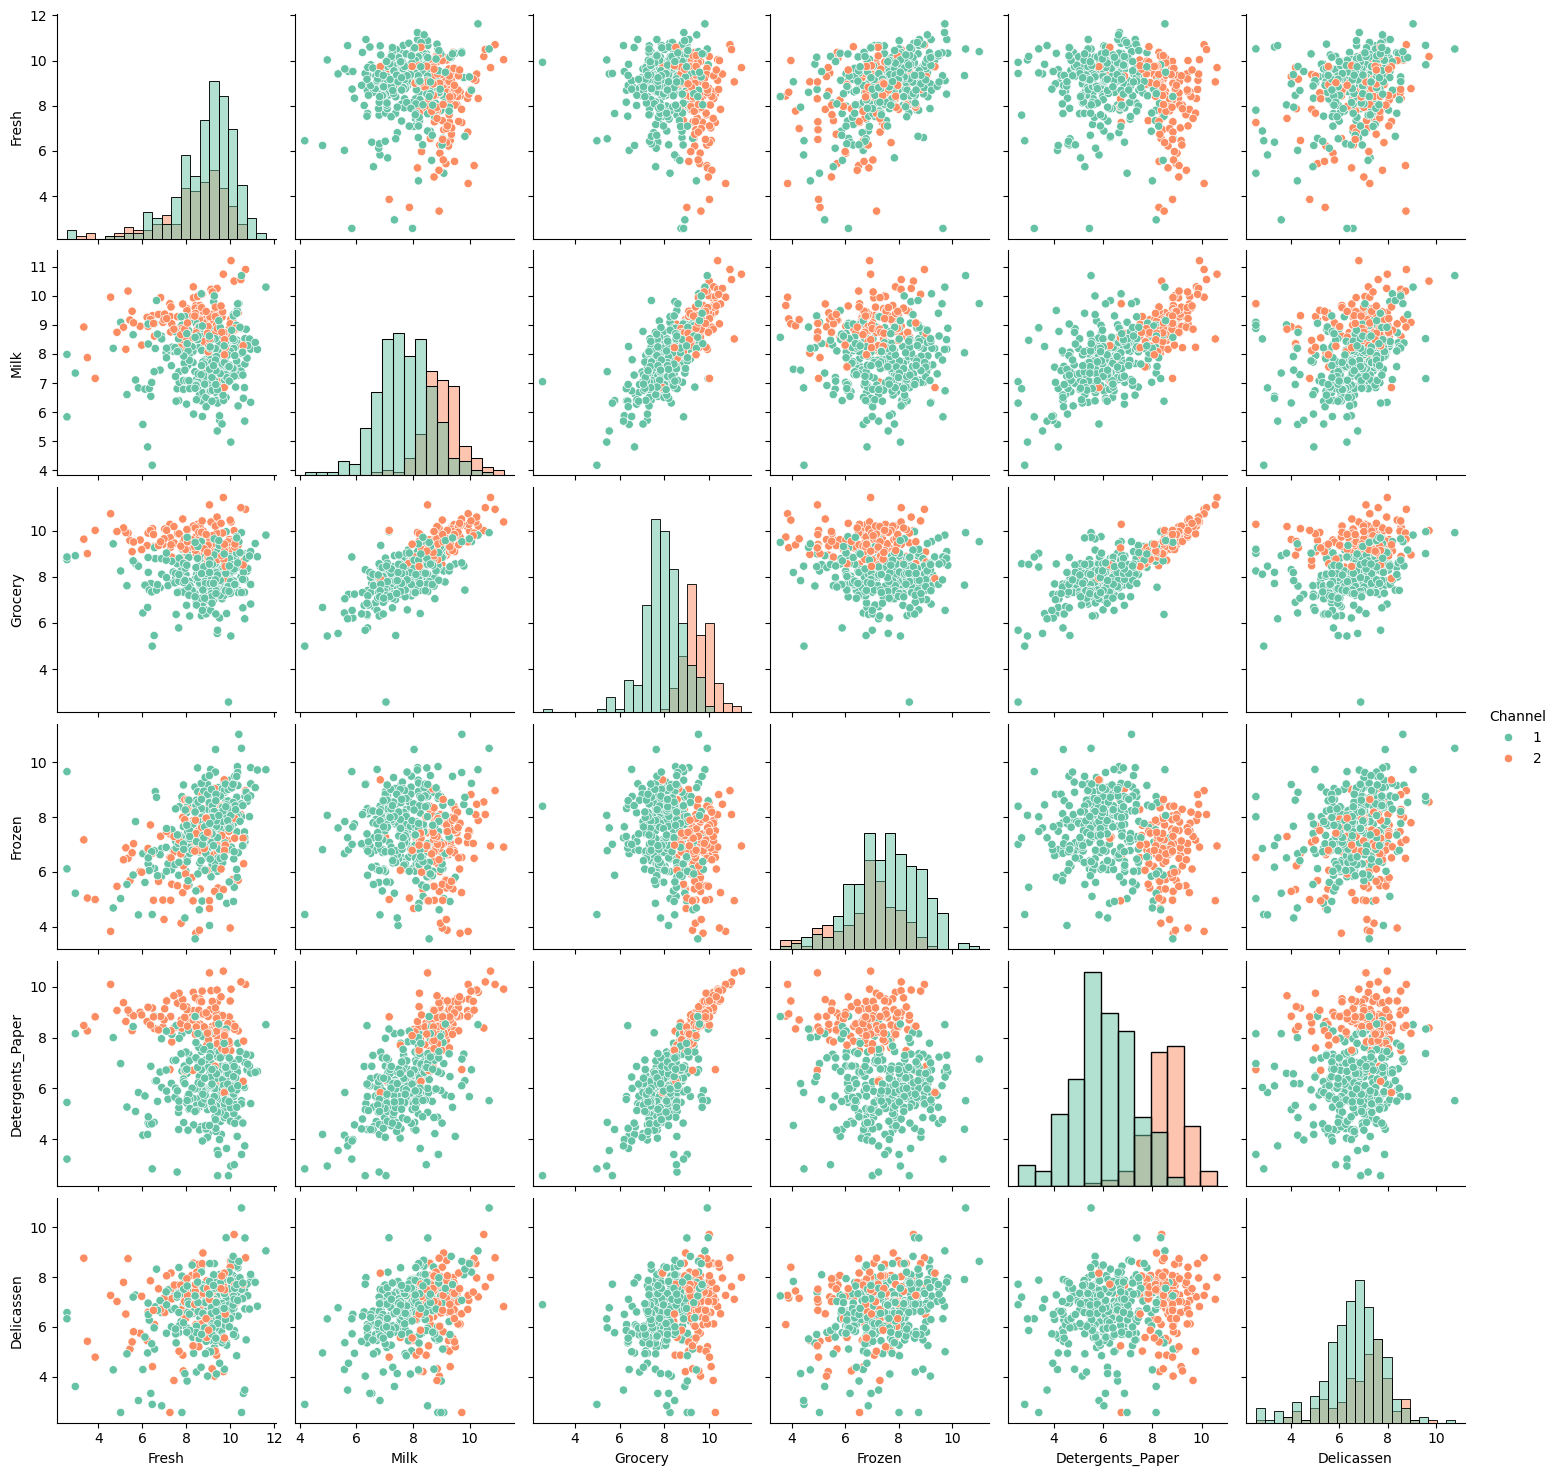

In [17]:
df_productsTransasctionByChannel = df_customerData.drop(['Region'], axis=1)
sns.pairplot(df_productsTransasctionByChannel, hue='Channel', diag_kind='hist', palette = 'Set2')

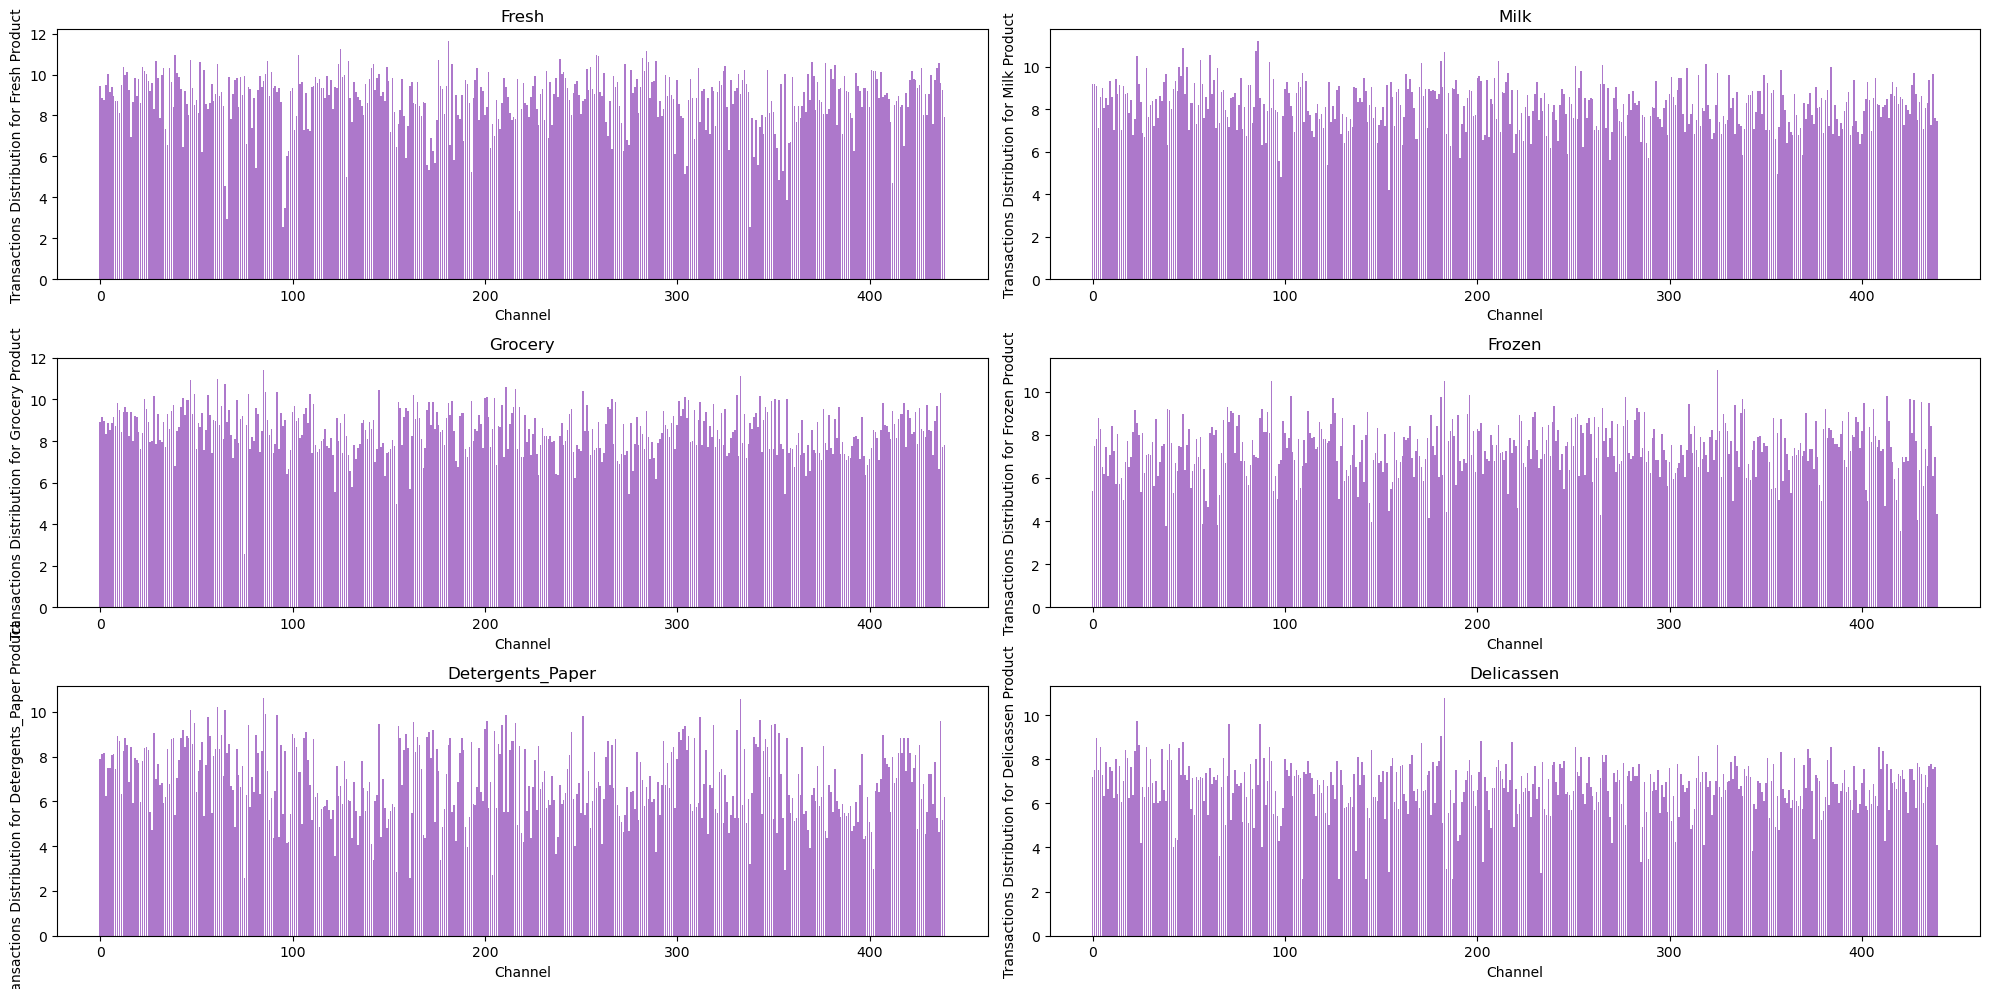

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
start_index=2
for idx, column_name in enumerate(df_customerData):
    if idx >= start_index:
        
        row = (idx-start_index) // 2
        col = (idx-start_index) % 2
        
        ax[row,col].bar(df_customerData[column_name].index, df_customerData[column_name], color='#AD78CB')
        ax[row,col].set_xlabel('Channel')
        ax[row,col].set_ylabel('Transactions Distribution for {} Product'.format(column_name))
        ax[row,col].set_title(column_name)
        
plt.tight_layout()
plt.show()

# 2 Detecting Anomalies


### 2.1 Robust anomaly models


# df_customerData

In [ ]:
df_customer = df_customerData.iloc[:,2:]
test1 = df_customer.iloc[0:1,:]
test2 = df_customer.iloc[1:2,:]
print(test1)
print(test2)
#test = (test1-test2).astype(np.float32)
print(np.sqrt(np.sum(np.square(df_customer.loc[0]-df_customer.loc[1]))))
#print(test.info)

<b>outlier score: performing a minimum over the N − 1 remaining points in the data <br>
<center>$z_{jk} = ∥x_j − x_k∥^2$</center><br>
<center>$y_j = \min_{k \neq j} z_{jk}$</center></b>

In [ ]:
def hardmin_outlier_score(df_customer):
    #dtype = [('idx_i', int), ('idx_j', int), ('min_distance', float)]
    dtype = [('idx_i', int), ('min_distance', float)]

    min_results = np.zeros(len(df_customer), dtype=dtype)

    distance = np.zeros((len(df_customer), len(df_customer)), dtype=float)

    for i in range(len(df_customer)):
        for j in range(i+1, len(df_customer)):
            dist = np.sum(np.square(df_customer.loc[i] - df_customer.loc[j]))
            distance[i, j] = dist
            distance[j, i] = dist
            #print('i:', i,'df_customer.loc[i]:', df_customer.loc[i],'j:',j,'df_customer.loc[j]:', df_customer.loc[j],'dist', dist)
            if min_results[i]['min_distance'] == 0 or dist < min_results[i]['min_distance']:
                min_results[i] = (i, dist)
                #print('i:', i, 'min_result:', min_results[i])
    return min_results

In [ ]:
min_results = hardmin_outlier_score(df_customer)
print(min_results)
#sort based on minimum distance
sorted_indices = np.argsort(min_results, order='min_distance')
sorted_mins = min_results[sorted_indices]
#print(sorted_mins)

In [ ]:
#get the top 10 minimum distance
sorted_mins_df = pd.DataFrame(sorted_mins)
top_10_distance = sorted_mins_df.iloc[-10:]
print(top_10_distance)

In [ ]:
#(refer back to the original data) get all the data with index in the top 10 minimum distance
df_top10 = df_customer.loc[top_10_distance['idx_i']]
print(df_top10)

In [ ]:
#visualize top 10 anomalous data

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.scatterplot(x=range(len(min_results)), y=min_results['min_distance'], color='#CBC878', label='All Data')
sns.scatterplot(x=top_10_distance['idx_i'], y=top_10_distance['min_distance'], color='#CB7878', label='Top 10 Anomalies')
plt.xlabel('Index')
plt.ylabel('Minimum Distance to The Nearest Neighbour')
plt.title('Anomaly Detection')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
start_index = 0
for idx, column_name in enumerate(df_customer):
    if idx >= start_index:
        
        row = (idx - start_index) // 2
        col = (idx - start_index) % 2
        sns.scatterplot(data=df_customer, x=df_customer.index, y=column_name, ax=ax[row, col], color='#AACE7E')
        sns.scatterplot(data=df_top10, x=df_top10.index, y=column_name, ax=ax[row, col], color='#613DA4')
        ax[row, col].set_xlabel('Index')
        ax[row, 
           col].set_ylabel('Purchase Anomaly for {} Product'.format(column_name))
        ax[row, col].set_title(column_name)
        
plt.tight_layout()
plt.show()

<b>Replacing hard minimum with soft minimum
<center>$y_j = soft \min_{k \neq j} z_{jk}$</center><br>
<center>${{soft}} \min_{k \neq j} z_{jk} = -\frac{1}{\gamma}log(\frac{1}{N-1} \sum \limits _{k \neq j} exp(-\gamma z_{jk}))$</center></b>

In [ ]:
z_jk = min_results
print(z_jk[1][1])

In [ ]:
def softmin_outlier_score(gamma, df, z_jk):
    N = len(df)
    
    dtype = [('idx_i', int), ('min_distance', float)]

    min_results = np.zeros(len(df), dtype=dtype)

    for i in range(len(df)):
        for j in range(i+1, len(df)):
            dist = (-1/gamma)*np.log((1/(N-1))*np.sum(np.exp(-(gamma*z_jk[i][1]))))
            #print('i:', i,'df_customer.loc[i]:', df_customer.loc[i],'j:',j,'df_customer.loc[j]:', df_customer.loc[j],'dist', dist)
            if min_results[i]['min_distance'] == 0 or dist < min_results[i]['min_distance']:
                min_results[i] = (i, dist)
                #print('i:', i, 'min_result:', min_results[i])
    return min_results

In [ ]:
gamma = 0.1
softmin_score = softmin_outlier_score(gamma, df_customer, min_results)

In [ ]:
print(softmin_score['min_distance'])

### 2.2 Selecting a suitable parameter γ (Bootstrap)

In [ ]:
df_customer

In [ ]:
def bootstrap(gamma, n_bootstrap, sample_size):

    softmin_score_xx = np.zeros((n_bootstrap, len(df_customer)), dtype=float)

    for i in range(n_bootstrap):

        print('gamma:', gamma, 'i:',i)
        
        df_xx_idx = np.random.choice(df_customer.index, size=sample_size, replace=True)
        df_xx = df_customer.loc[df_xx_idx].reset_index(drop=True)

        min_results = hardmin_outlier_score(df_xx)
        softmin_score = softmin_outlier_score(gamma, df_xx, min_results)
        softmin_score_xx[i] = softmin_score['min_distance']
        
    return softmin_score_xx

In [ ]:
gamma = 0.1
n_bootstrap = 30
sample_size = 440
softmin_score_01 = bootstrap(gamma, n_bootstrap, sample_size)
mean_01 =  np.mean(softmin_score_01, axis=0)
std_dev_01 = np.std(softmin_score_01, axis=0)

gamma = 1
n_bootstrap = 30
sample_size = 440
softmin_score_1 = bootstrap(gamma, n_bootstrap, sample_size)
mean_1 =  np.mean(softmin_score_1, axis=0)
std_dev_1 = np.std(softmin_score_1, axis=0)

gamma = 10
n_bootstrap = 30
sample_size = 440
softmin_score_10 = bootstrap(gamma, n_bootstrap, sample_size)
mean_10 =  np.mean(softmin_score_10, axis=0)
std_dev_10 = np.std(softmin_score_10, axis=0)



In [ ]:
gamma = 100
n_bootstrap = 30
sample_size = 440
softmin_score_100 = bootstrap(gamma, n_bootstrap, sample_size)
mean_100 =  np.mean(softmin_score_100, axis=0)
std_dev_100 = np.std(softmin_score_100, axis=0)

In [ ]:
mean_10.shape

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(df_customer)), mean_01, yerr=std_dev_01, fmt='o', ecolor='#4332AD', capsize=5, capthick=2, 
             markeredgecolor='#AD3232', markerfacecolor='#C23247')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation for Each Data Point')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(df_customer)), mean_1, yerr=std_dev_1, fmt='o', ecolor='#4332AD', capsize=5, capthick=2, 
             markeredgecolor='#AD3232', markerfacecolor='#C23247')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation for Each Data Point')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(df_customer)), mean_10, yerr=std_dev_10, fmt='o', ecolor='#4332AD', capsize=5, capthick=0.5, 
             markeredgecolor='#AD3232', markerfacecolor='#C23247')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation for Each Data Point')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(df_customer)), mean_100, yerr=std_dev_100, fmt='o', ecolor='#4332AD', capsize=5, capthick=0.5, 
             markeredgecolor='#AD3232', markerfacecolor='#C23247')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation for Each Data Point')
plt.grid(True)
plt.show()

# 3 Getting Insight Into Anomalies

### 3.1 Relation Between Anomalies and Meta-Data

In [ ]:
#Anomalies Divided by Region
df_customerData

In [ ]:
#Anomalies Divided by CHannel